# 1. Load a dataset

In [ ]:
#IMPORTING THE RELEVANT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AjStephan/curcumin/main/PubChem_compound_list.csv')
df.head()

,cmpdname,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,isosmiles,exactmass,monoisotopicmass,xlogp
0,1-Aminopropan-2-ol,75.11,46.2,5,2,2,1,CC(CN)O,75.0684,75.0684,-1.0
1,"1-Chloro-2,4-dinitrobenzene",202.55,91.6,13,0,4,0,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,201.9780,201.9780,2.3
2,"1,2-Dichloroethane",98.96,0.0,4,0,0,1,C(CCl)Cl,97.9690,97.9690,1.5
3,"1,2,4-Trichlorobenzene",181.40,0.0,9,0,0,0,C1=CC(=C(C=C1Cl)Cl)Cl,179.9300,179.9300,4.0
4,"2,3-Dihydroxybenzoic acid",154.12,77.8,11,3,4,1,C1=CC(=C(C(=C1)O)O)C(=O)O,154.0270,154.0270,1.2


### Data Preprocessing

In [ ]:
numerical_data = df.drop(['cmpdname', 'isosmiles', 'mw', 'exactmass', 'monoisotopicmass' ], axis=1)


In [ ]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
numerical_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,xlogp
count,22038.000000,22038.000000,22038.000000,22038.000000,22038.000000,21697.000000
mean,76.350048,48.949542,0.646928,5.315500,35.082948,14.961718
std,47.373090,24.923736,1.721971,2.737998,24.394489,10.438526
min,0.000000,1.000000,0.000000,0.000000,0.000000,-21.400000
25%,61.800000,20.000000,0.000000,4.000000,5.000000,3.100000
50%,78.900000,63.000000,0.000000,6.000000,50.000000,20.200000
75%,78.900000,69.000000,0.000000,6.000000,55.000000,23.200000
max,902.000000,125.000000,29.000000,55.000000,74.000000,34.900000


# 2. Clean the data

In [ ]:
numerical_data.isnull().sum()

polararea       0
heavycnt        0
hbonddonor      0
hbondacc        0
rotbonds        0
xlogp         341
dtype: int64

In [ ]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay

data_no_mv = numerical_data.dropna(axis=0)

In [ ]:
data_no_mv.isnull().sum()

polararea     0
heavycnt      0
hbonddonor    0
hbondacc      0
rotbonds      0
xlogp         0
dtype: int64

In [ ]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,xlogp
count,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000
mean,75.663915,49.295525,0.619901,5.295571,35.531963,14.961718
std,44.287087,24.773641,1.659651,2.621649,24.298595,10.438526
min,0.000000,1.000000,0.000000,0.000000,0.000000,-21.400000
25%,61.800000,21.000000,0.000000,5.000000,5.000000,3.100000
50%,78.900000,63.000000,0.000000,6.000000,50.000000,20.200000
75%,78.900000,69.000000,0.000000,6.000000,55.000000,23.200000
max,873.000000,125.000000,29.000000,52.000000,74.000000,34.900000


In [ ]:
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21697 entries, 0 to 22037
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   polararea   21697 non-null  float64
 1   heavycnt    21697 non-null  int64  
 2   hbonddonor  21697 non-null  int64  
 3   hbondacc    21697 non-null  int64  
 4   rotbonds    21697 non-null  int64  
 5   xlogp       21697 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.2 MB


In [ ]:
data_no_mv.columns

Index(['polararea', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'xlogp'], dtype='object')

In [ ]:
cols = ['xlogp', 'polararea', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds']

In [ ]:
data_no_mv.head()

,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,xlogp
0,46.2,5,2,2,1,-1.0
1,91.6,13,0,4,0,2.3
2,0.0,4,0,0,1,1.5
3,0.0,9,0,0,0,4.0
4,77.8,11,3,4,1,1.2


In [ ]:
data_no_mv.columns

Index(['polararea', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'xlogp'], dtype='object')

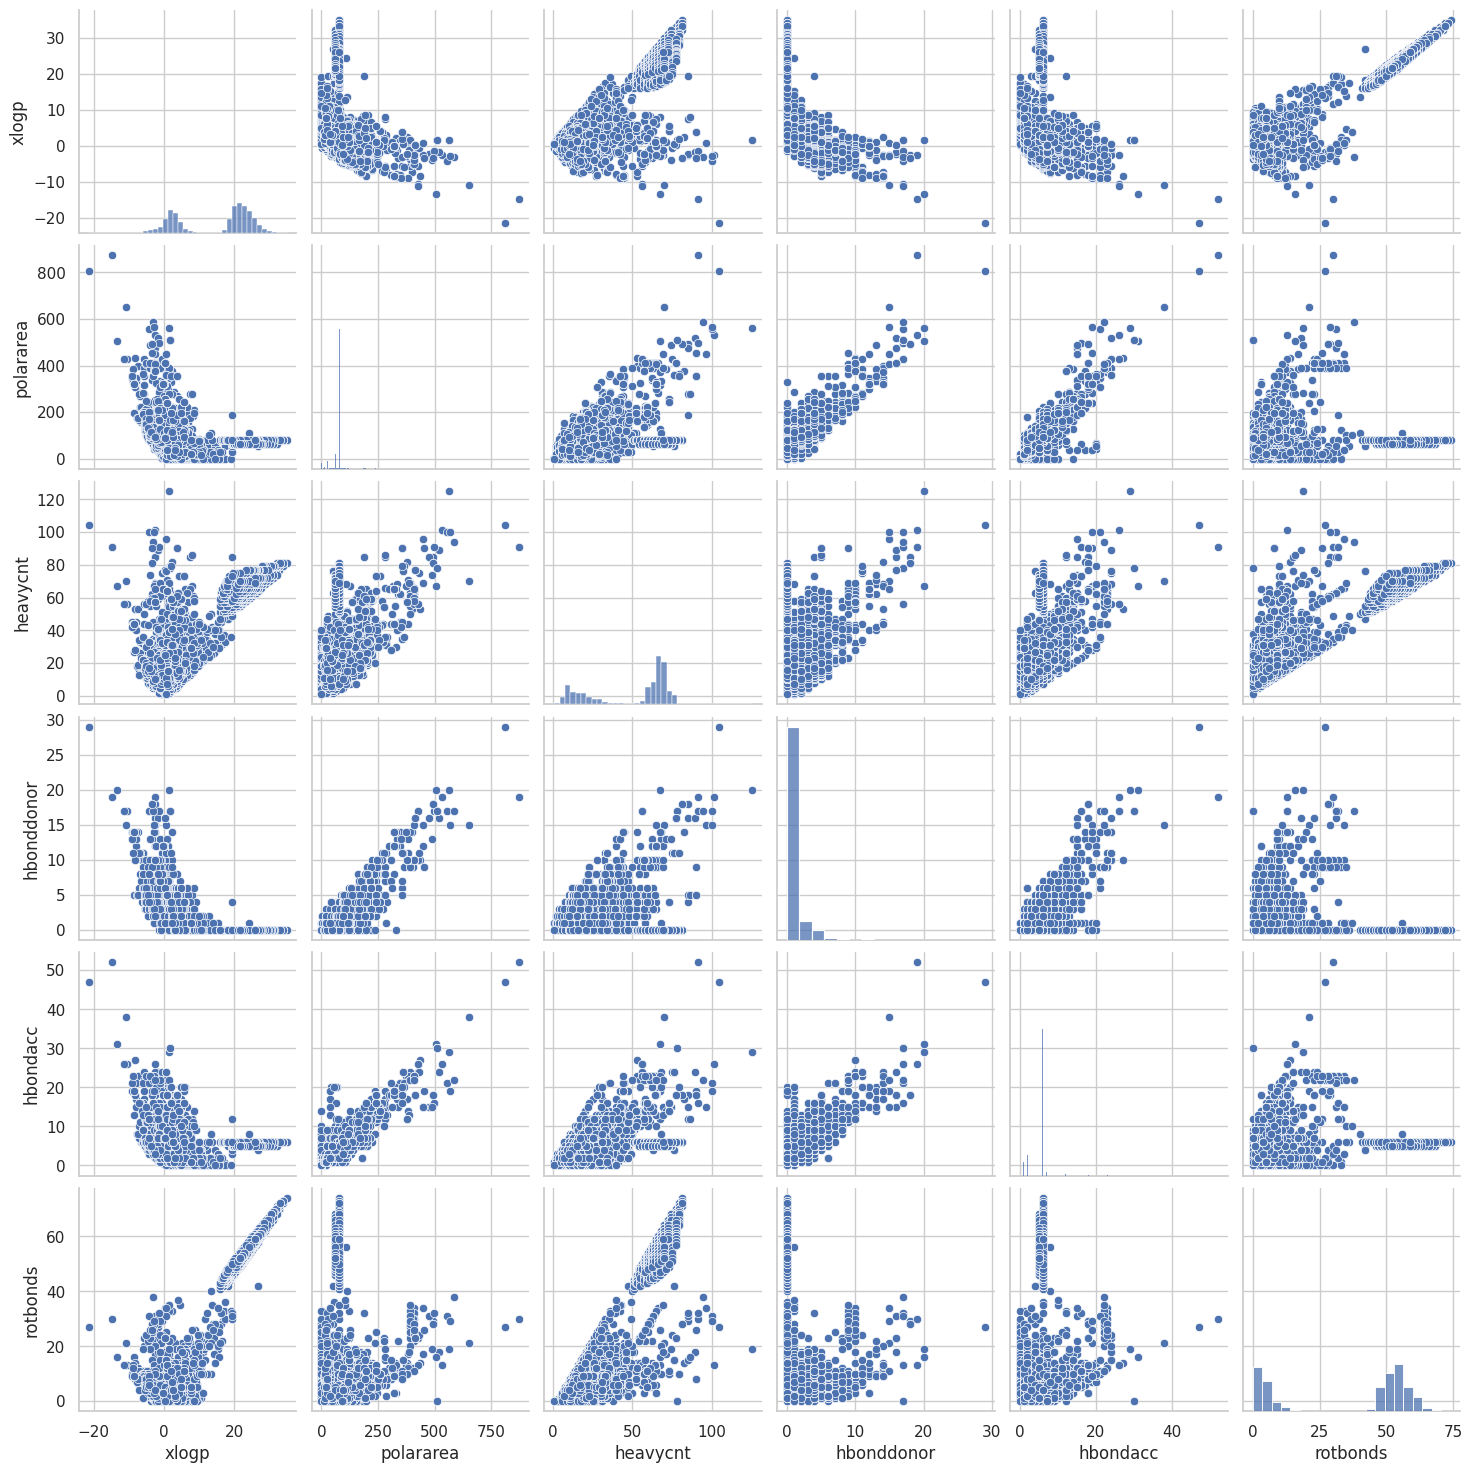

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(data_no_mv[cols])

In [ ]:
data_no_mv.corr()

,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,xlogp
polararea,1.000000,0.298413,0.740235,0.888785,0.097491,-0.032019
heavycnt,0.298413,1.000000,-0.271199,0.543949,0.952388,0.922000
hbonddonor,0.740235,-0.271199,1.000000,0.489584,-0.441135,-0.542695
hbondacc,0.888785,0.543949,0.489584,1.000000,0.345328,0.240429
rotbonds,0.097491,0.952388,-0.441135,0.345328,1.000000,0.979181
xlogp,-0.032019,0.922000,-0.542695,0.240429,0.979181,1.000000


#3. Plot correlation matrix

In [ ]:

df_new = df.drop(['cmpdname','isosmiles','xlogp','exactmass', 'monoisotopicmass'],axis=1)
df_new


,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds
0,75.11,46.2,5,2,2,1
1,202.55,91.6,13,0,4,0
2,98.96,0.0,4,0,0,1
3,181.40,0.0,9,0,0,0
4,154.12,77.8,11,3,4,1
...,...,...,...,...,...,...
22033,843.10,195.0,59,4,16,11
22034,507.50,152.0,34,2,10,10
22035,432.50,116.0,31,1,8,7
22036,749.90,194.0,52,2,10,8


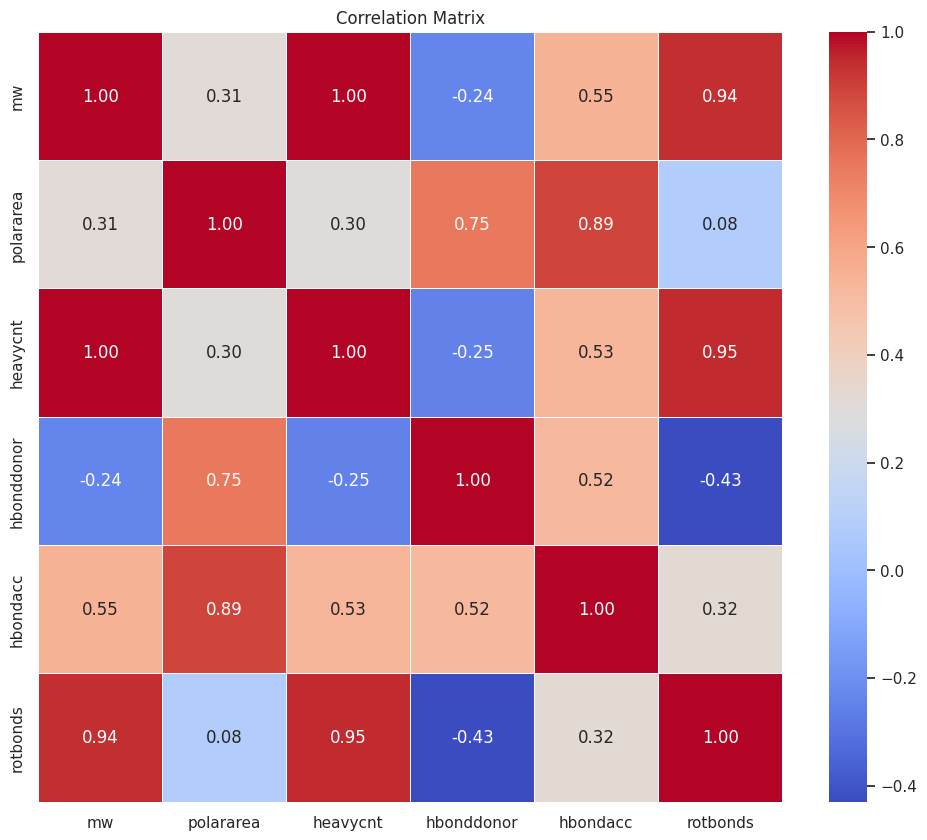

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_new.corr()

# Create the correlation matrix plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

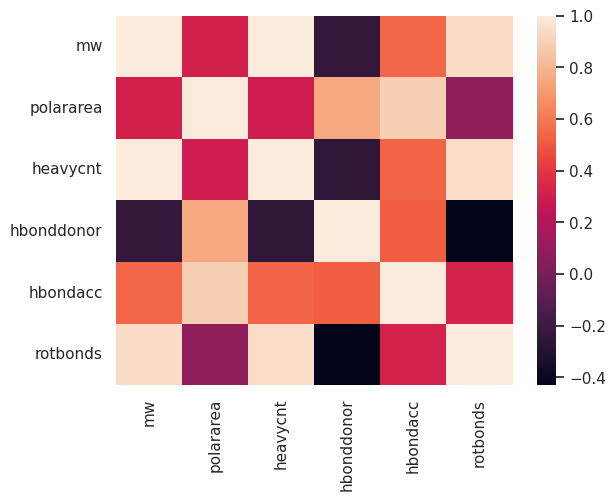

In [ ]:
import seaborn as sns

sns.heatmap(df_new.corr());

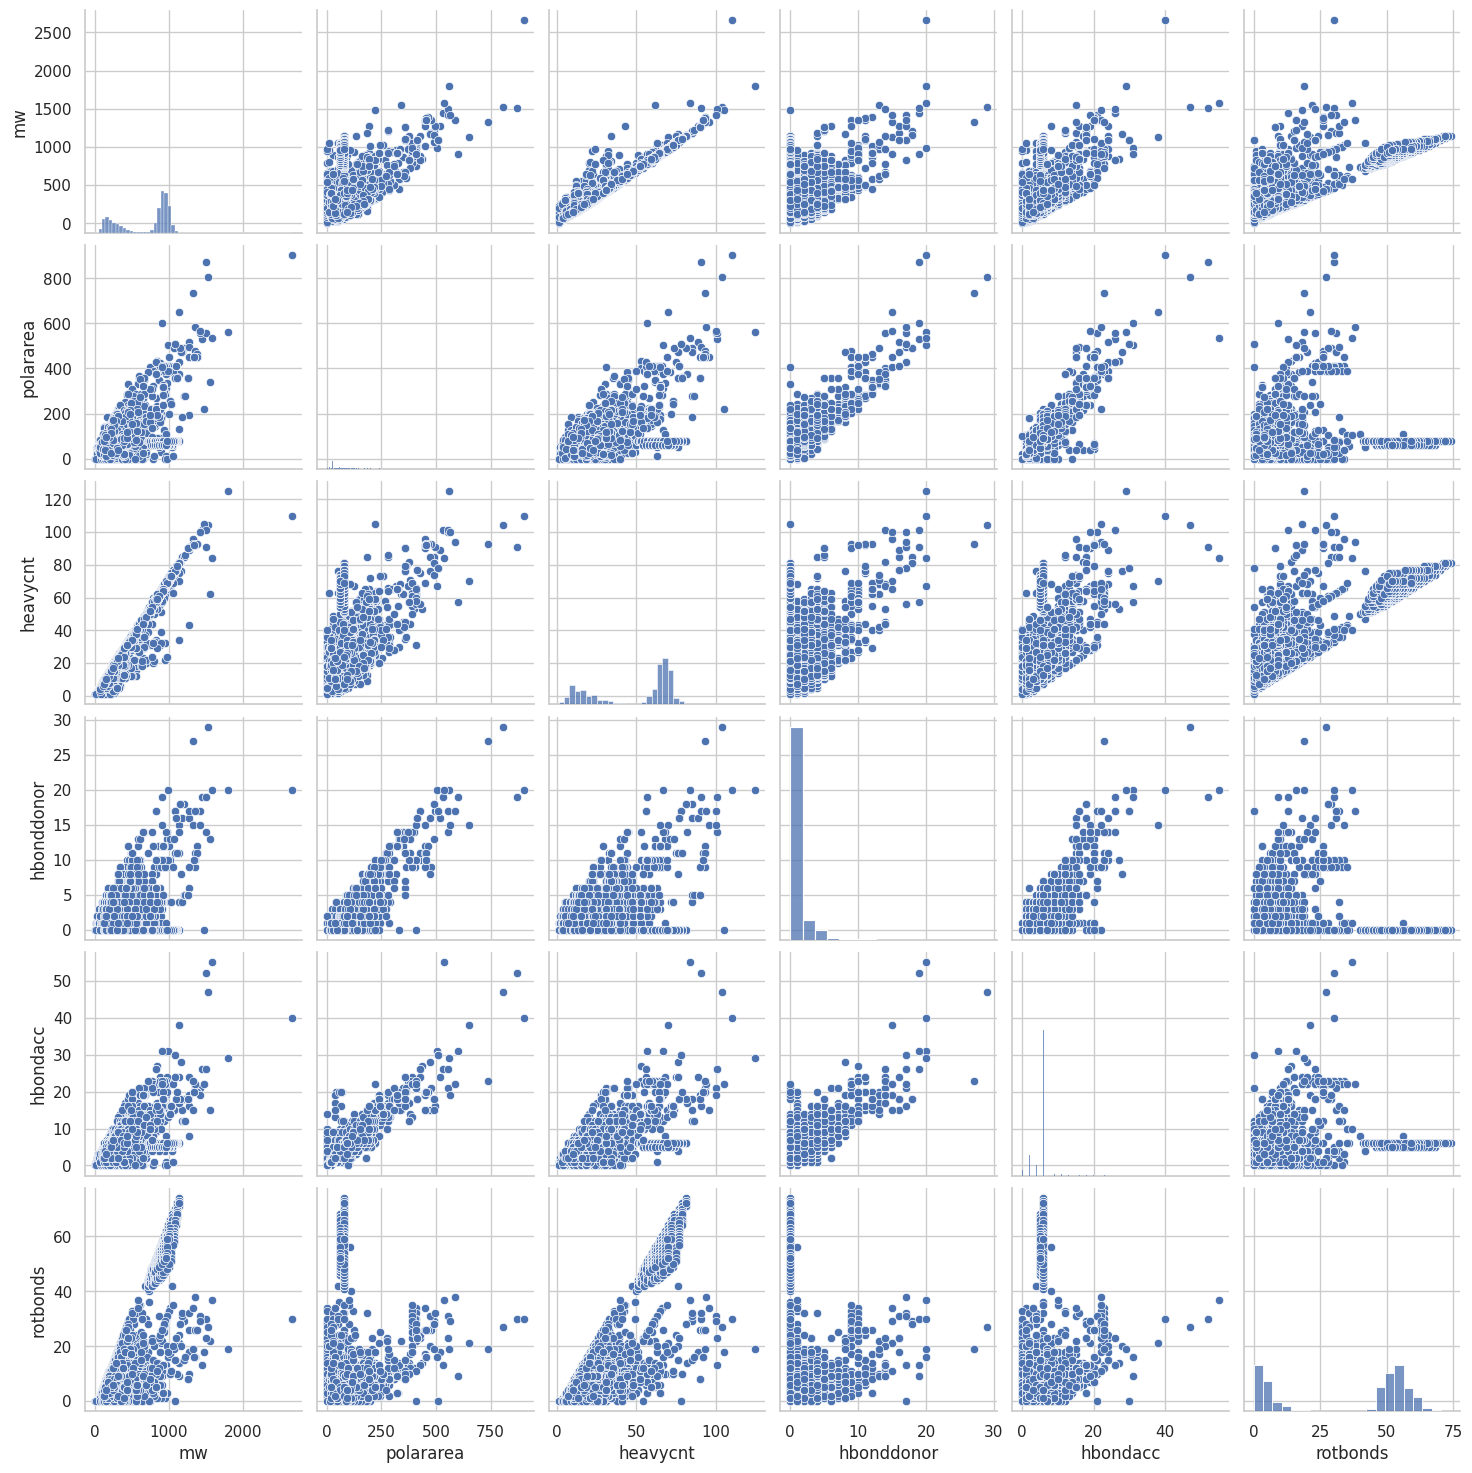

In [ ]:
sns.pairplot(df_new);

# 4. Run the regression




## Scaling the features

###Scaling the variables is a very important step in SVM. Because any variable on the larger scale, has a larger effect on the distance between observations.

###for this data set we are going to use standardization as our scaling strategy.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
df_sc = scale.fit_transform(data_no_mv)
df_sc = pd.DataFrame(df_sc, columns = data_no_mv.columns)

In [ ]:
df_sc.head()

,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,xlogp
0,-0.665309,-1.788052,0.831579,-1.257089,-1.421183,-1.529151
1,0.359844,-1.465120,-0.373522,-0.494193,-1.462339,-1.213007
2,-1.708526,-1.828418,-0.373522,-2.019986,-1.421183,-1.289648
3,-1.708526,-1.626586,-0.373522,-2.019986,-1.462339,-1.050145
4,0.048234,-1.545853,1.434129,-0.494193,-1.421183,-1.318389


### Defining the variables and splitting the data

In [ ]:
y = data_no_mv['xlogp']
X = data_no_mv.drop('xlogp', axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 365)

## SVM Regression with Sklearn

In [ ]:
from sklearn.svm import SVR

In [ ]:
#Fitting SVM regression to the training set
SVM_regression = SVR()
SVM_regression.fit(x_train, y_train)

SVR()

In [ ]:
#predicting the test set result
y_hat = SVM_regression.predict(x_test)

In [ ]:
predictions = pd.DataFrame({'y_test': y_test, 'y_hat':y_hat})
predictions.head()

,y_test,y_hat
1839,0.1,1.010063
15708,19.4,19.533614
3263,3.1,1.681892
2910,1.4,2.518766
16400,21.4,21.345358


# 5. Display the evaluation metrics

Mean Squared Error (MSE): 1.2050538957797092
Mean Absolute Error (MAE): 0.5087443538354367
R-squared (R2) Score: 0.9890600751616729
Explained Variance Score: 0.9890747351019077



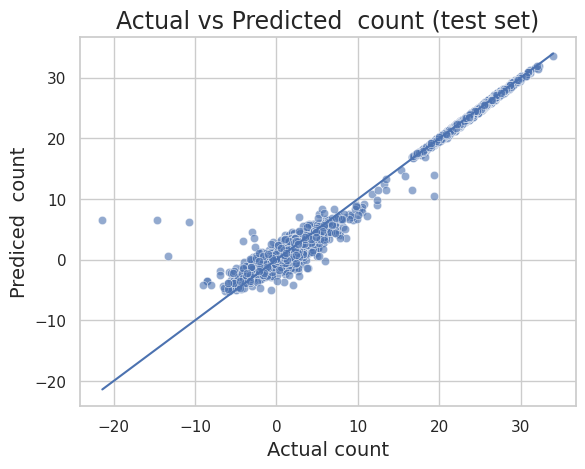

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models
models = [
    ('Support Vector Regression', SVR())
]
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
explained_variance = explained_variance_score(y_test, y_hat)


# Displaying evaluation metric results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()


In [ ]:
SVM_regression.score(x_test, y_test)

0.9890600751616729

In [ ]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test = round(np.sqrt(MSE_test),2)
MSE_test

1.1

## Try to use C = 1

#6. Tuning hyperparameters:
##Gridsearch

###Finding the right hyper parameters (like C, gamma and the Kernel function) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

C represents cost of misclassification. A large C means that you are penalizing the errors more restricly so the margin will be narrower ie overfitting (small bias, big variance) https://scikit-learn.org/stable/modules/svm.html

gamma is the free prameter in the radial basis function (rbf). Intuitively, the gamma parameter (inverse of variance) defines how far the influence of a single training example reaches with low values meaning ‘far’ and high values meaning ‘close’.

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [ ]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [ ]:
# May take a while!
grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  16.7s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  11.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  12.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  12.6s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  13.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  18.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  17.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  20.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  17.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  16.7s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  15.1s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

### What fit does is a bit more involved than usual. First, it tries multiple combinations from param_grid by cross-validation to find the best parameter combination. Once it has the best combination, it retrain the model using optimal hyperparameters on the entire train set.

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVR(C=10, gamma=0.01)

In [ ]:
y_hat_optimized = grid.predict(x_test)

In [ ]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
1839,0.1,1.010063,0.330645
15708,19.4,19.533614,19.498439
3263,3.1,1.681892,1.350533
2910,1.4,2.518766,2.271457
16400,21.4,21.345358,21.394128


Mean Squared Error (MSE): 1.2050538957797092
Mean Absolute Error (MAE): 0.5087443538354367
R-squared (R2) Score: 0.9890600751616729
Explained Variance Score: 0.9890747351019077



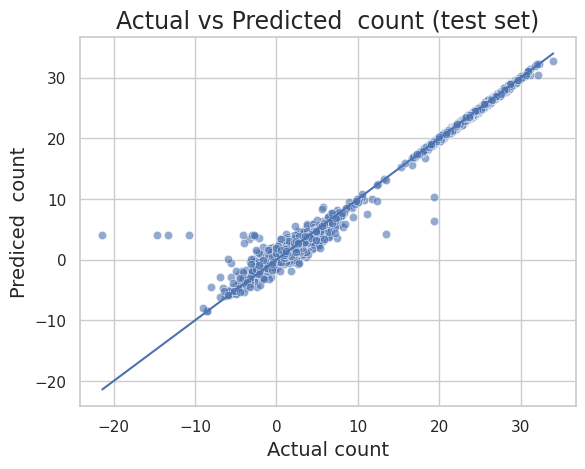

In [ ]:
#Define the models
models = [
    ('Support Vector Regression', SVR())
]

sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
explained_variance = explained_variance_score(y_test, y_hat)

# Menampilkan hasil metrik evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

#sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
#sns.lineplot(x=y_test, y=y_test)

#plt.xlabel('Actual count', fontsize=14)
#plt.ylabel('Prediced  count', fontsize=14)
#plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
#plt.show()





In [ ]:
grid.score(x_test, y_test)

0.9919475840374411

In [ ]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.94

##Cross validation
###We will use Cross validation to estimate performance metrics in the test set.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
NMSE = cross_val_score(estimator = SVR(C=1, gamma=0.01), X = x_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [ ]:
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.942

#7. Feature selection ANOVA and Recursive Feature Elimination (RFE)

## ANOVA

In [ ]:
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
data_no_mv.head()

,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,xlogp
0,46.2,5,2,2,1,-1.0
1,91.6,13,0,4,0,2.3
2,0.0,4,0,0,1,1.5
3,0.0,9,0,0,0,4.0
4,77.8,11,3,4,1,1.2


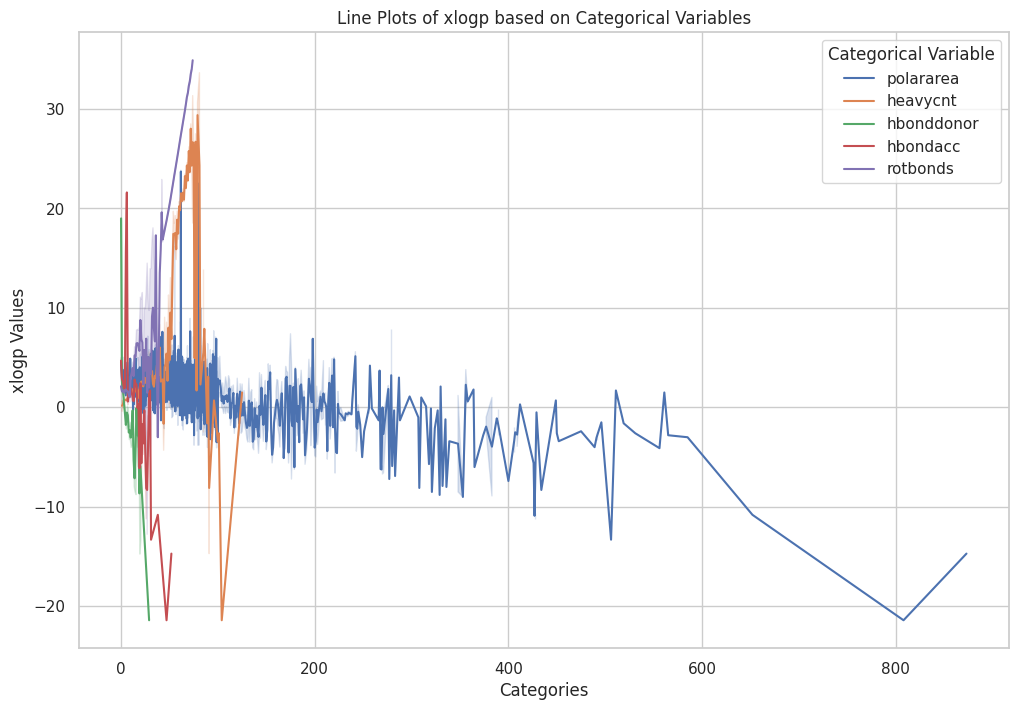

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_no_mv' is your DataFrame
plt.figure(figsize=(12, 8))

# Line plot for polararea
sns.lineplot(x='polararea', y='xlogp', data=data_no_mv, label='polararea')

# Line plot for heavycnt
sns.lineplot(x='heavycnt', y='xlogp', data=data_no_mv, label='heavycnt')

# Line plot for hbonddonor
sns.lineplot(x='hbonddonor', y='xlogp', data=data_no_mv, label='hbonddonor')

# Line plot for hbondacc
sns.lineplot(x='hbondacc', y='xlogp', data=data_no_mv, label='hbondacc')

# Line plot for rotbonds
sns.lineplot(x='rotbonds', y='xlogp', data=data_no_mv, label='rotbonds')

plt.title('Line Plots of xlogp based on Categorical Variables')
plt.xlabel('Categories')
plt.ylabel('xlogp Values')
plt.legend(title='Categorical Variable')
plt.show()


In [ ]:
model = ols('xlogp ~ polararea + heavycnt + hbonddonor + hbondacc + rotbonds', df).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
polararea,5503.341292,1.0,2576.489323,0.000000e+00
heavycnt,9115.426457,1.0,4267.552691,0.000000e+00
hbonddonor,408.779287,1.0,191.377458,2.431228e-43
hbondacc,1.660539,1.0,0.777412,3.779437e-01
rotbonds,54104.362396,1.0,25329.941329,0.000000e+00
Residual,46331.640074,21691.0,NaN,NaN


In ANOVA analysis, the most important or significant parameters are typically identified by the values of F and p (PR(>F)). The higher the F value and the lower the p value, the more significant the influence. In this case: The variables **rotbonds, heavycnt, and polararea** have high F values and very low p values, indicating that these three variables have a significant influence in explaining variability in the data. These values suggest that there is a significant difference between the tested groups for these variables.


In [ ]:
# Run the regression

data_new = data_no_mv.drop(['hbondacc', 'hbonddonor' ],axis =1)


In [ ]:
y_new = data_new['xlogp']
x_new = data_new.drop('xlogp', axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 365)

Support Vector Regression:
Mean Squared Error (MSE): 2.3002722888524163
Mean Absolute Error (MAE): 1.1194540994182356
R-squared (R2) Score: 0.9791172776289399
Explained Variance Score: 0.9792972776663368



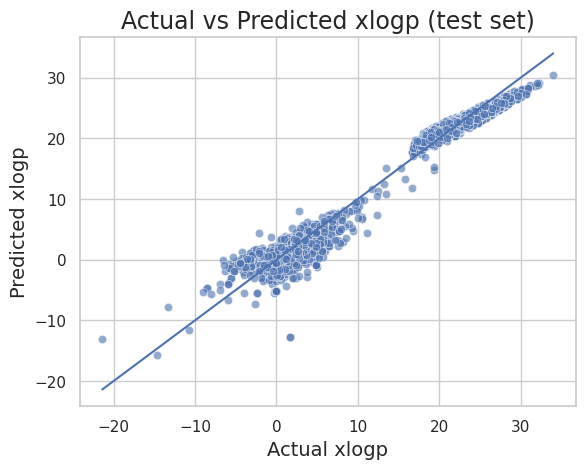

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import seaborn as sns
import matplotlib.pyplot as plt


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=365)

# Define the SVR model with modified parameters
svr_model = SVR(kernel='linear', C=1.0, gamma='scale')

# Train the SVR model
svr_model.fit(x_train, y_train)

# Make predictions
y_hat = svr_model.predict(x_test)

# Plotting the scatterplot and lineplot
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
explained_variance = explained_variance_score(y_test, y_hat)

# Display evaluation metric results
print(f'Support Vector Regression:\nMean Squared Error (MSE): {mse}\nMean Absolute Error (MAE): {mae}\nR-squared (R2) Score: {r2}\nExplained Variance Score: {explained_variance}\n')

# Plotting settings
plt.xlabel('Actual xlogp', fontsize=14)
plt.ylabel('Predicted xlogp', fontsize=14)
plt.title('Actual vs Predicted xlogp (test set)', fontsize=17)
plt.show()


## Recursive Feature Elimination (RFE)

polararea selected=False rank=2
heavycnt selected=True rank=1
hbonddonor selected=True rank=1
hbondacc selected=False rank=3
rotbonds selected=True rank=1


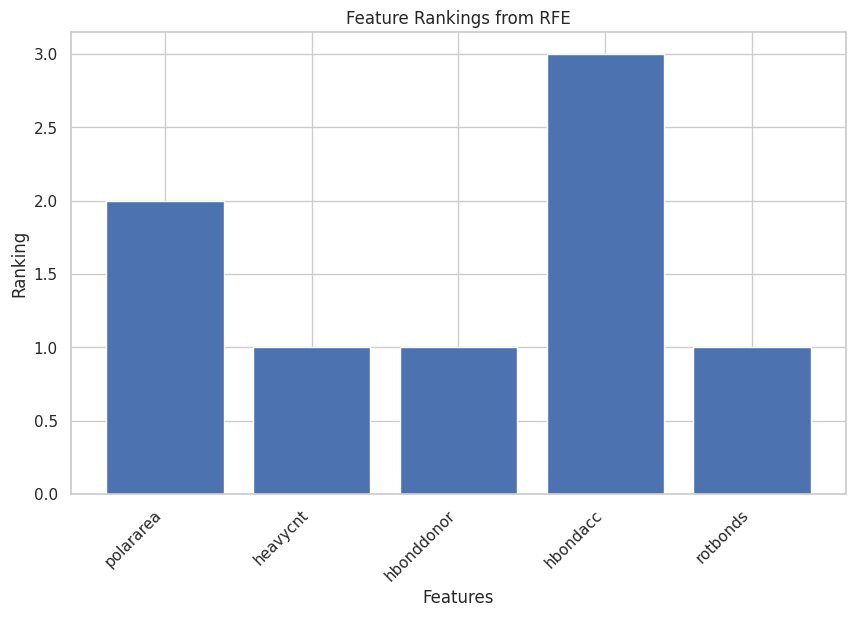

In [ ]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create the RFE model with Linear Regression
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X, y)

# Print selected features and their rankings
for i, col in zip(range(len(X.columns)), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

# Plotting the bar graph for feature rankings
plt.figure(figsize=(10, 6))
plt.bar(range(len(rfe.ranking_)), rfe.ranking_)
plt.xticks(range(len(X.columns)), X.columns, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Rankings from RFE')
plt.show()


In the realm of Recursive Feature Elimination (RFE) analysis, the significance of features is gauged through their respective rankings. A lower rank denotes higher importance for predicting model outcomes. In this RFE exploration, **polararea,heavycnt, and rotbonds** all share the coveted rank of 1, underscoring their paramount importance in shaping the model's predictive prowess.

In [ ]:
# Run the regression

data_new = data_no_mv.drop(['hbondacc', 'hbonddonor' ],axis =1)

In [ ]:
y_new1 = data_new['xlogp']
X_new1 = data_new.drop('xlogp', axis = 1)

Support Vector Regression:
Mean Squared Error (MSE): 2.3002722888524163
Mean Absolute Error (MAE): 1.1194540994182356
R-squared (R2) Score: 0.9791172776289399
Explained Variance Score: 0.9792972776663368



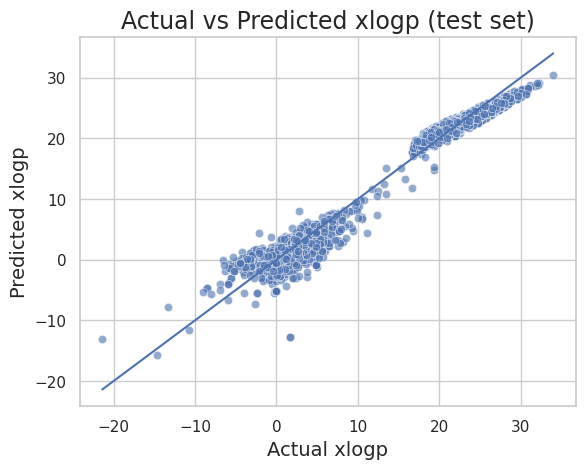

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_new1, y_new1, test_size=0.2, random_state=365)

# Define the SVR model with modified parameters
svr_model = SVR(kernel='linear', C=1.0, gamma='scale')

# Train the SVR model
svr_model.fit(x_train, y_train)

# Make predictions
y_hat = svr_model.predict(x_test)

# Plotting the scatterplot and lineplot
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
explained_variance = explained_variance_score(y_test, y_hat)

# Display evaluation metric results
print(f'Support Vector Regression:\nMean Squared Error (MSE): {mse}\nMean Absolute Error (MAE): {mae}\nR-squared (R2) Score: {r2}\nExplained Variance Score: {explained_variance}\n')

# Plotting settings
plt.xlabel('Actual xlogp', fontsize=14)
plt.ylabel('Predicted xlogp', fontsize=14)
plt.title('Actual vs Predicted xlogp (test set)', fontsize=17)
plt.show()
